<a href="https://colab.research.google.com/github/Pratt33/ML_Algorithms_From_Scratch/blob/main/Stochastic_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Objective:

1. Predict diabetes progression based on various medical and lifestyle features.

2. Accurate predictions help in early diagnosis, prevention strategies, and patient management.

# Problem Statement:

1. Given a dataset with 10 medical features and corresponding target values (disease progression),

2. we aim to build a regression model to predict diabetes progression.

# Business Constraints:

1. The model should provide quick predictions as it may be integrated into a real-time system.

2. Interpretability is essential since medical professionals may require explanations for predictions.

3. Accuracy is important, but the model should also generalize well to unseen data.

4. Computational efficiency is a key factor in choosing between Batch Gradient Descent (Linear Regression) and SGD.

In [1]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# Load the diabetes dataset
X, y = load_diabetes(return_X_y=True)

In [3]:
# Display dataset shape
print("Feature Matrix Shape:", X.shape)  # (442, 10) -> 442 samples, 10 features
print("Target Vector Shape:", y.shape)   # (442,) -> 442 target values

Feature Matrix Shape: (442, 10)
Target Vector Shape: (442,)


In [4]:
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [5]:
# Implementing Linear Regression (Batch Gradient Descent)
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [6]:
# Display learned coefficients and intercept
print("Coefficients:", reg.coef_)
print("Intercept:", reg.intercept_)

Coefficients: [  -9.15865318 -205.45432163  516.69374454  340.61999905 -895.5520019
  561.22067904  153.89310954  126.73139688  861.12700152   52.42112238]
Intercept: 151.88331005254167


In [7]:
# Make predictions on the test set
y_pred = reg.predict(X_test)

In [8]:
# Evaluate model performance using R^2 score
print("R2 Score (Linear Regression):", r2_score(y_test, y_pred))

R2 Score (Linear Regression): 0.4399338661568968


In [9]:
class SGDRegressor:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.coef_ = None  # Coefficients
        self.intercept_ = None  # Intercept
        self.lr = learning_rate  # Learning rate
        self.epochs = epochs  # Number of iterations
        self.losses = []  # Store loss values for visualization

    def fit(self, X_train, y_train):
        """Train the model using Stochastic Gradient Descent"""
        # Initialize coefficients and intercept
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])

        # Perform stochastic gradient descent for the specified number of epochs
        for _ in range(self.epochs):
            total_loss = 0  # Track total loss per epoch
            for _ in range(X_train.shape[0]):
                idx = np.random.randint(0, X_train.shape[0])  # Random sample index
                y_hat = np.dot(X_train[idx], self.coef_) + self.intercept_  # Prediction

                # Compute gradients
                intercept_der = -2 * (y_train[idx] - y_hat)
                coef_der = -2 * np.dot((y_train[idx] - y_hat), X_train[idx])

                # Update parameters
                self.intercept_ -= self.lr * intercept_der
                self.coef_ -= self.lr * coef_der

                # Compute loss
                loss = (y_train[idx] - y_hat) ** 2
                total_loss += loss

            # Store average loss for visualization
            self.losses.append(total_loss / X_train.shape[0])

        # Display final parameters
        print("Final Intercept:", self.intercept_)
        print("Final Coefficients:", self.coef_)

    def predict(self, X_test):
        """Make predictions using the trained model"""
        return np.dot(X_test, self.coef_) + self.intercept_

    def plot_loss_curve(self):
        """Visualize the loss reduction over epochs"""
        plt.figure(figsize=(8, 5))
        plt.plot(range(1, self.epochs + 1), self.losses, marker='o', linestyle='-')
        plt.xlabel("Epochs")
        plt.ylabel("Average Loss")
        plt.title("SGD Loss Curve")
        plt.grid()
        plt.show()

In [10]:
# Instantiate and train the Stochastic Gradient Descent Regressor
sgdr = SGDRegressor(epochs=50, learning_rate=0.01)
sgdr.fit(X_train, y_train)
# for equal no. of epochs sgd is slower than bgd
# but since sgd converges in fewer epochs than bgd it is faster

Final Intercept: 149.99008958619132
Final Coefficients: [  66.03745089  -64.11780439  344.03104494  246.37894792   23.3795993
  -23.38141092 -168.72435349  128.03611944  322.47501822  136.84817668]


In [11]:
# Make predictions using the trained model
y_pred_sgd = sgdr.predict(X_test)

In [12]:
# Evaluate the Stochastic Gradient Descent model performance
print("R2 Score (SGD Regressor):", r2_score(y_test, y_pred_sgd))
# as bgd moves confidently towards its target, sgd shows lack of confidence and more randomness while reaching target
# in sgd it may happen that next step is worse than the first step

R2 Score (SGD Regressor): 0.42897397665912296


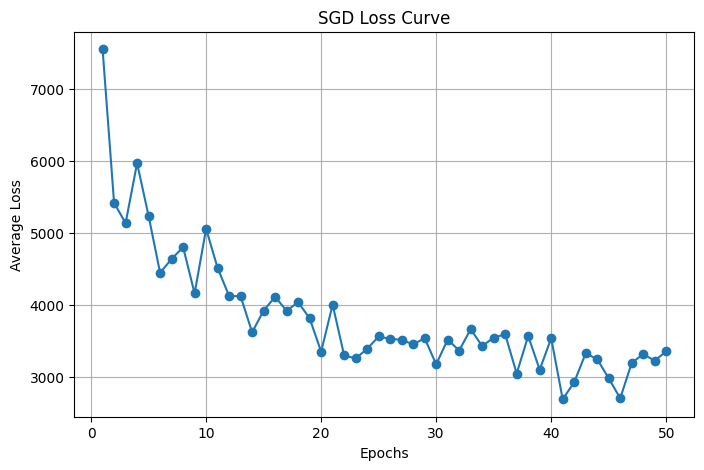

In [13]:
sgdr.plot_loss_curve()  # Plot loss curve

# Conclusion:

 - Linear Regression (Batch Gradient Descent) provides more stable and confident updates but may take longer to converge.

 - Stochastic Gradient Descent introduces randomness, which can sometimes cause erratic updates but converges faster in many cases.

 - The choice between the two depends on computational constraints and dataset size.

 - If data size is large, SGD is preferable for faster convergence, whereas BGD is better for small datasets requiring stability.